In [151]:
import math
import numpy as np
import sounddevice as sd


In [152]:
def square(freq, t, phase, shift):
    a = (np.sin(freq * t + phase)) + shift
    d = np.round(a)
    return d

In [181]:
sample_rate = 44100
duration = 1000 # in seconds

frequency_x = 0.5
frequency_y = 0.5

phase_x = np.pi/2
phase_y = 0

amplitude_x = 1
amplitude_y = 1

t = np.linspace(0, duration * 2 * np.pi , int(duration * sample_rate))

squarewave = square(2 *  frequency_x, t, 0, 0.5)

left = np.abs(np.sin(frequency_x * t + phase_x ) * amplitude_x) * squarewave
right = np.sin(frequency_y * t + phase_y) * amplitude_y


sinewave_data = np.array([right,left]).T


In [182]:
sd.play(sinewave_data, sample_rate)

In [183]:
sd.stop()



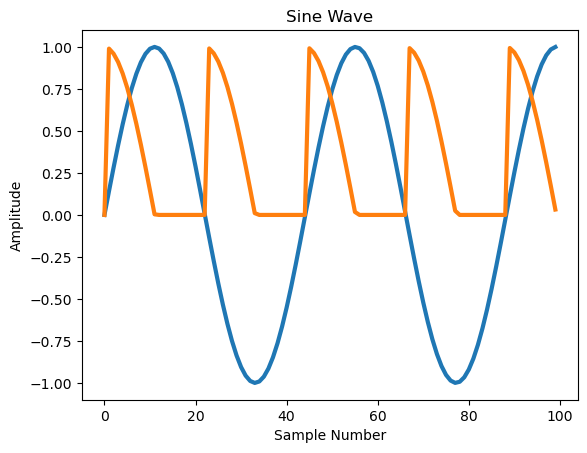

In [171]:
import matplotlib.pyplot as plt

# slicing 500 samples off of your wavfile should show about 5 cycles
plot_data = sinewave_data[:100]

fig, ax = plt.subplots()
ax.plot(plot_data, linewidth=3)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.title('Sine Wave')
plt.show()

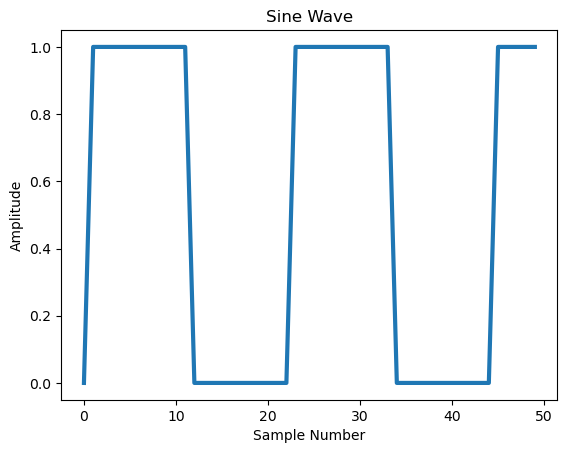

In [144]:
import matplotlib.pyplot as plt

# slicing 500 samples off of your wavfile should show about 5 cycles
plot_data = squarewave[:50]

fig, ax = plt.subplots()
ax.plot(plot_data, linewidth=3)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()